# Import and Ingest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

## Cutoff until 2017

In [2]:
df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year <= 2017]
df.set_index('date', inplace = True)
print(df.shape)  # (123, 8)
df.tail()

(1096, 12)


Bitcoin  Bitcoin Crash  Blockchain  Crisis  Cryptocurrency  \
date                                                                     
2017-12-27     32.0            6.0        59.0   28.80           23.22   
2017-12-28     33.0            4.0        59.0   29.44           25.37   
2017-12-29     27.0            7.0        48.0   32.64           26.66   
2017-12-30     27.0           10.0        42.0   28.80           29.67   
2017-12-31     22.0            5.0        39.0   24.96           24.51   

            Nicehash  Hashing    GPU  GeForce  mining  Tesla         Price  
date                                                                        
2017-12-27      18.0     59.0  71.78    39.60    73.0  31.68  16930.900391  
2017-12-28      22.0     52.0  69.56    31.35    72.0  28.16  15888.400391  
2017-12-29      17.0     48.0  65.12    37.40    61.0  25.28  15279.000000  
2017-12-30      22.0     44.0  62.90    37.95    64.0  24.32  14681.900391  
2017-12-31      26.0     48.0  68.08    34.10    63.0  21.44  14377.400391

# Visualize the Time Series

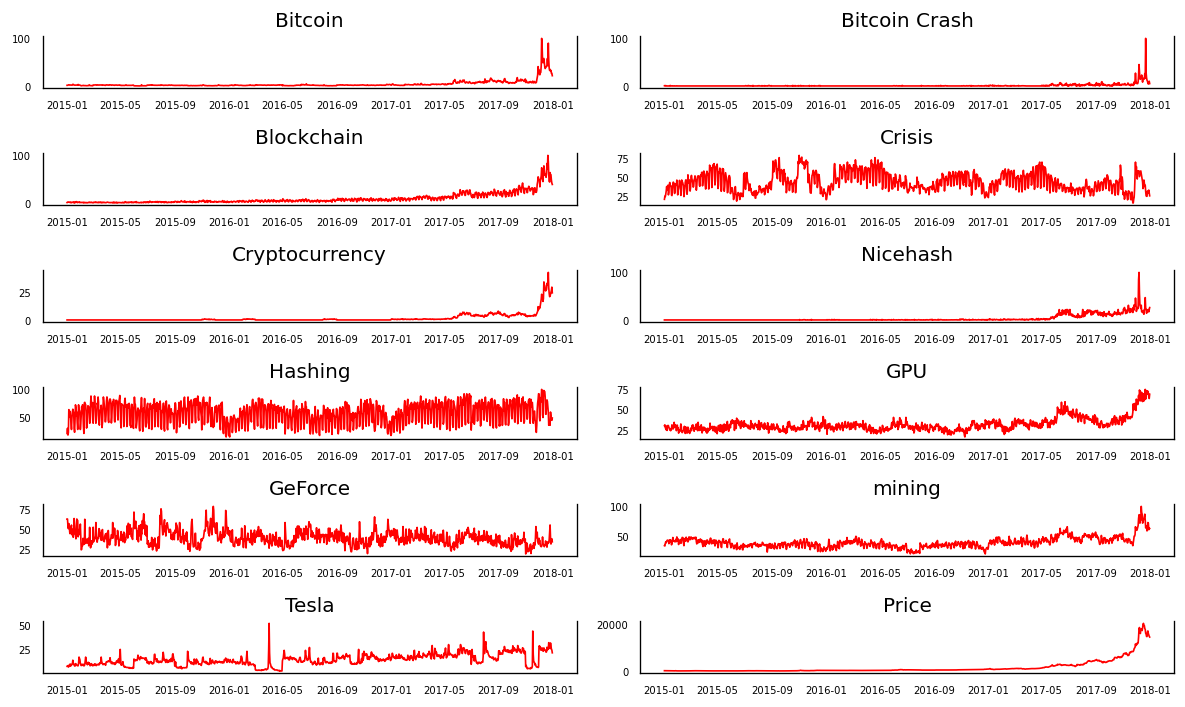

In [3]:
# Plot
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing Causation using Grangerâ€™s Causality Test

In [4]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

Bitcoin_x  Bitcoin Crash_x  Blockchain_x  Crisis_x  \
Bitcoin_y            1.0000           0.0000        0.0000    0.0297   
Bitcoin Crash_y      0.0000           1.0000        0.0000    0.3860   
Blockchain_y         0.0000           0.0000        1.0000    0.0000   
Crisis_y             0.0346           0.0468        0.0004    1.0000   
Cryptocurrency_y     0.0000           0.0000        0.0000    0.0232   
Nicehash_y           0.0000           0.0000        0.0000    0.0055   
Hashing_y            0.0002           0.0394        0.0000    0.0000   
GPU_y                0.0000           0.0000        0.0000    0.0001   
GeForce_y            0.0104           0.0547        0.0000    0.0000   
mining_y             0.0000           0.0000        0.0000    0.0000   
Tesla_y              0.0000           0.0000        0.0000    0.0002   
Price_y              0.0000           0.0000        0.0000    0.0003   

                  Cryptocurrency_x  Nicehash_x  Hashing_x   GPU_x  GeForce_x  \
Bitcoin_y                   0.0000      0.0000     0.0060  0.0000     0.0737   
Bitcoin Crash_y             0.0000      0.0000     0.0424  0.0000     0.0119   
Blockchain_y                0.0000      0.0000     0.0000  0.0001     0.0057   
Crisis_y                    0.0129      0.0252     0.0000  0.0012     0.0000   
Cryptocurrency_y            1.0000      0.0000     0.0011  0.0000     0.4655   
Nicehash_y                  0.0000      1.0000     0.0610  0.0000     0.0510   
Hashing_y                   0.0001      0.0000     1.0000  0.0000     0.0003   
GPU_y                       0.0000      0.0000     0.0000  1.0000     0.0010   
GeForce_y                   0.0121      0.0013     0.0000  0.0896     1.0000   
mining_y                    0.0000      0.0000     0.0000  0.0000     0.0000   
Tesla_y                     0.0000      0.0000     0.0000  0.0001     0.0787   
Price_y                     0.0000      0.0000     0.2151  0.0001     0.6463   

                  mining_x  Tesla_x  Price_x  
Bitcoin_y              0.0   0.0035   0.0000  
Bitcoin Crash_y        0.0   0.0000   0.0000  
Blockchain_y           0.0   0.0012   0.0000  
Crisis_y               0.0   0.0000   0.0099  
Cryptocurrency_y       0.0   0.0455   0.0000  
Nicehash_y             0.0   0.0001   0.0000  
Hashing_y              0.0   0.0474   0.0000  
GPU_y                  0.0   0.0001   0.0000  
GeForce_y              0.0   0.0005   0.0002  
mining_y               1.0   0.0019   0.0000  
Tesla_y                0.0   1.0000   0.0000  
Price_y                0.0   0.0010   1.0000

# Cointegration Test

In [5]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name            ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col, 15), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name            ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Bitcoin         ::  934.02    > 311.1288  =>   True
Bitcoin Crash   ::  658.3     > 263.2603  =>   True
Blockchain      ::  405.4     > 219.4051  =>   True
Crisis          ::  309.29    > 179.5199  =>   True
Cryptocurrency  ::  225.5     > 143.6691  =>   True
Nicehash        ::  159.9     > 111.7797  =>   True
Hashing         ::  100.16    > 83.9383   =>   True
GPU             ::  64.87     > 60.0627   =>   True
GeForce         ::  40.29     > 40.1749   =>   True
mining          ::  18.55     > 24.2761   =>   False
Tesla           ::  3.32      > 12.3212   =>   False
Price           ::  1.32      > 4.1296    =>   False


# Split the Series into Training and Testing Data

In [6]:
nobs = 20
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(1076, 12)
(20, 12)


# Check for Stationarity and Make the Time Series Stationary

In [7]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
        return True
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
        return False
# ADF Test on each column
stationary = True
for name, column in df_train.iteritems():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Bitcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.6739
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.9981. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Crash" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.857
 No. Lags Chosen       = 20
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Blockchain" 
    -----------------------------------------------
 Null Hypothesis: Da

## 1st difference

In [8]:
df_differenced = df_train.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
stationary = True
for name, column in df_differenced.iteritems():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Bitcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.7368
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.9905. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Crash" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.3273
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0137. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Blockchain" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root.

## 2nd difference

In [9]:
df_differenced = df_differenced.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
stationary = True
for name, column in df_differenced.iteritems():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Bitcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.9304
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Crash" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.7137
 No. Lags Chosen       = 22
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Blockchain" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signific

# Select the Order (P) of VAR model

In [10]:
model = VAR(df_differenced)
x = model.select_order(maxlags=20)
x.summary()

C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.table.SimpleTable'>

# Train the VAR Model of Selected Order(p)

In [11]:
model_fitted = model.fit(20)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Jun, 2022
Time:                     00:22:15
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    40.8739
Nobs:                     1054.00    HQIC:                   32.4232
Log likelihood:          -29422.6    FPE:                7.64349e+11
AIC:                      27.2635    Det(Omega_mle):     6.45865e+10
--------------------------------------------------------------------
Results for equation Bitcoin
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.017744         0.033612            0.528           0.598
L1.Bitcoin                -1.304262         0.055441          -23.525           0.000
L1.Bitcoin Crash           0.088738   

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [12]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Bitcoin : 1.97
Bitcoin Crash : 1.99
Blockchain : 2.07
Crisis : 1.99
Cryptocurrency : 1.98
Nicehash : 2.02
Hashing : 2.01
GPU : 2.02
GeForce : 2.01
mining : 2.01
Tesla : 2.01
Price : 1.95


# Forecast VAR model using statsmodels

In [13]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

20


array([[-3.28000000e+00, -3.51000000e+00, -1.65000000e+00,
        -8.40000000e+00, -1.56000000e+00,  2.30000000e+00,
        -1.65600000e+01,  2.28000000e+00, -9.54000000e+00,
        -1.32000000e+00, -1.32000000e+00, -5.82001953e+01],
       [ 1.23000000e+00,  1.89000000e+00, -9.35000000e+00,
        -2.10000000e+00,  7.20000000e-01, -8.74000000e+00,
         1.19600000e+01,  1.71000000e+00,  1.16600000e+01,
         0.00000000e+00,  3.08000000e+00,  1.15410156e+01],
       [ 1.23000000e+00, -2.70000000e-01,  1.10000000e+01,
         8.40000000e+00,  3.60000000e-01,  1.70200000e+01,
        -9.20000000e+00,  6.27000000e+00,  4.77000000e+00,
         7.26000000e+00, -2.64000000e+00,  1.41619141e+02],
       [-8.88178420e-16,  1.62000000e+00, -3.30000000e+00,
         4.90000000e+00,  1.20000000e+00, -1.74800000e+01,
         6.44000000e+00, -1.76700000e+01, -2.59700000e+01,
         6.60000000e-01,  8.80000000e-01,  3.10000000e+02],
       [ 4.92000000e+00,  5.13000000e+00,  6.0500000

In [14]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

Bitcoin_2d  Bitcoin Crash_2d  Blockchain_2d  Crisis_2d  \
date                                                                 
2017-12-12  -24.628065        -19.390918      16.234661  22.581810   
2017-12-13   14.832030         27.106469     -52.148415 -13.362501   
2017-12-14   48.347730         16.909925      38.236152 -14.024989   
2017-12-15   16.337842          9.718802      12.237643  33.255271   
2017-12-16  -72.334402        -55.660479     -56.762523 -53.048240   
2017-12-17  -35.226676         -5.753727     -14.658867 -18.066130   
2017-12-18   19.163473         18.046998      39.959511  38.218961   
2017-12-19   51.232149         13.535052      57.660770  -1.972430   
2017-12-20  -27.324342        -24.359332     -33.923223  50.439668   
2017-12-21  -24.586973         13.089553     -52.995593  -6.029028   
2017-12-22   72.810198         53.259519      49.306441 -31.127618   
2017-12-23   60.102619          2.951391      10.972492  -6.686978   
2017-12-24 -100.270174        -73.217338     -42.213081  -8.009960   
2017-12-25 -109.979609        -38.217715     -54.772328 -29.849656   
2017-12-26   47.567552         45.217390      46.091260 -29.362289   
2017-12-27  106.574320         43.333260     106.121276  54.387883   
2017-12-28  -29.527539        -41.713754     -35.819143  94.212266   
2017-12-29  -67.783229         -4.784643     -88.955829 -18.078652   
2017-12-30  103.651368         73.789366      13.875133 -78.433458   
2017-12-31   98.583505         38.067410     100.712730   9.671398   

            Cryptocurrency_2d  Nicehash_2d  Hashing_2d     GPU_2d  GeForce_2d  \
date                                                                            
2017-12-12          -3.927956    20.319724  -55.691485  12.385770   23.823826   
2017-12-13           6.766431    -8.679894    3.435185  45.228404  -22.568366   
2017-12-14           0.852725    42.144502   73.130272 -53.930766  -11.510157   
2017-12-15           1.461940   -14.168242  -48.657467 -22.029552  -18.827657   
2017-12-16         -12.379732   -60.925148   38.213620  15.141882   -1.029978   
2017-12-17           4.060306   -67.528171 -137.651287  31.304812   88.049653   
2017-12-18          -2.240754    84.093038  110.806891  -7.092828  -63.964437   
2017-12-19           3.583214    62.321291  -32.881640 -14.415126  -11.184874   
2017-12-20          -0.048876   -45.584907   12.536581  32.688431   81.905579   
2017-12-21           3.071631   -36.440500   52.834519  -7.628542  -70.449043   
2017-12-22           3.708970   137.121714  -54.895141  -9.874940  -36.794873   
2017-12-23           3.445254   -26.275251    9.662285 -51.095782   24.903381   
2017-12-24         -12.636525  -171.051859   28.162657  -6.427947   14.293236   
2017-12-25          -4.514623   -53.676802 -123.457898  80.147680   33.856842   
2017-12-26          -0.943333   118.855144   34.291347  -9.087099   -4.240401   
2017-12-27           9.558194    98.255663   99.055241 -34.131997  -62.247487   
2017-12-28          -0.336878   -36.800327  -22.629513  31.621752   73.627123   
2017-12-29           1.975481   -36.256662   -9.299126  35.503477   25.133511   
2017-12-30           7.455200    89.825899   38.656899 -56.275663 -118.120125   
2017-12-31           1.698982    45.162336  -58.654014 -62.953733  -67.019731   

            mining_2d   Tesla_2d     Price_2d  
date                                           
2017-12-12   1.877717  29.822968 -1948.606838  
2017-12-13  -5.791016 -36.199967   230.550444  
2017-12-14  20.359755  -0.614051  2988.907627  
2017-12-15  11.793503  10.071860  1901.791828  
2017-12-16 -44.330666  20.468680 -4992.915208  
2017-12-17  30.709180 -41.833433 -3620.897763  
2017-12-18 -19.249024   9.307821  2177.975822  
2017-12-19  -2.864211  11.542069  5007.734899  
2017-12-20  21.434895  36.300643 -2522.351543  
2017-12-21 -21.986372 -39.836066 -2091.236464  
2017-12-22  22.109730   5.184418  4197.857063  
2017-12-23   8.868425 -14.699683  4364.219499  
2017-12-24  -1.9

# Invert the transformation to get the real forecast

In [15]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [16]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)
cols = [s + '_forecast' for s in df.columns.values.tolist()]
df_results.loc[:, cols]

Bitcoin_forecast  Bitcoin Crash_forecast  Blockchain_forecast  \
date                                                                        
2017-12-12         40.371935               -1.390918            93.234661   
2017-12-13         38.575901                8.324632            73.320907   
2017-12-14         85.127596               34.950108            91.643305   
2017-12-15        148.017134               71.294385           122.203346   
2017-12-16        138.572270               51.978183            96.000864   
2017-12-17         93.900730               26.908254            55.139515   
2017-12-18         68.392662               19.885323            54.237677   
2017-12-19         94.116744               26.397444           110.996608   
2017-12-20         92.516484                8.550232           133.832318   
2017-12-21         66.329250                3.792574           103.672433   
2017-12-22        112.952215               52.294436           122.818990   
2017-12-23        219.677799              103.747688           152.938039   
2017-12-24        226.133209               81.983601           140.844007   
2017-12-25        122.609010               22.001800            73.977647   
2017-12-26         66.652362                7.237388            53.202547   
2017-12-27        117.270034               35.806237           138.548723   
2017-12-28        138.360167               22.661331           188.075756   
2017-12-29         91.667072                4.731782           148.646960   
2017-12-30        148.625344               60.591599           123.093297   
2017-12-31        304.167121              154.518826           198.252364   

            Crisis_forecast  Cryptocurrency_forecast  Nicehash_forecast  \
date                                                                      
2017-12-12        84.021810                18.002044          40.319724   
2017-12-13        96.441120                23.420520          47.959553   
2017-12-14        94.835440                29.691721          97.743884   
2017-12-15       126.485032                37.424861         133.359974   
2017-12-16       105.086383                32.778270         108.050915   
2017-12-17        65.621604                32.191985          15.213685   
2017-12-18        64.375786                29.364945           6.469493   
2017-12-19        61.157539                30.121120          60.046592   
2017-12-20       108.378958                30.828419          68.038783   
2017-12-21       149.571350                34.607348          39.590475   
2017-12-22       159.636124                42.095247         148.263881   
2017-12-23       163.013919                53.028400         230.662035   
2017-12-24       158.381754                51.325028         142.008330   
2017-12-25       123.899934                45.107033          -0.322176   
2017-12-26        60.055824                37.945705         -23.797538   
2017-12-27        50.599597                40.342571          50.982763   
2017-12-28       135.355637                42.402560          88.962738   
2017-12-29       202.033024                46.438030          90.686051   
2017-12-30       190.276953                57.928700         182.235264   
2017-12-31       188.192280                71.118353         318.946812   

            Hashing_forecast  GPU_forecast  GeForce_forecast  mining_forecast  \
date                                                                            
2017-12-12         69.308515     60.485770         52.973826        77.877717   
2017-12-13         55.052216    106.259943         52.579286        72.964418   
2017-12-14        113.926189     98.103350         40.674590        88.410874   
2017-12-15        124.142694     67.917205          9.942237       115.650832   
2017-12-16        172.572820     52.872942        -21.820095        98.560125   
2017-12-17         83.351658     69.133491         34.467227       112.178596   
2017-12-18        

# Plot of Forecast vs Actuals

In [17]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Evaluate the Forecasts

In [18]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [19]:
for col in df.columns.values.tolist():
    print('\nForecast Accuracy of: ' + col)
    accuracy_prod = forecast_accuracy(df_results[col + '_forecast'].values, df_test[col])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: Bitcoin
mape :  2.4426
me :  78.6018
mae :  81.407
mpe :  2.3909
rmse :  105.2598
corr :  -0.2884
minmax :  0.5831

Forecast Accuracy of: Bitcoin Crash
mape :  3.4877
me :  21.5632
mae :  33.2092
mpe :  3.065
rmse :  47.75
corr :  0.0315
minmax :  0.6483

Forecast Accuracy of: Blockchain
mape :  1.0201
me :  51.584
mae :  53.44
mpe :  0.9907
rmse :  69.3897
corr :  -0.2308
minmax :  0.3963

Forecast Accuracy of: Crisis
mape :  2.7368
me :  83.819
mae :  83.819
mpe :  2.7368
rmse :  98.342
corr :  -0.4942
minmax :  0.6326

Forecast Accuracy of: Cryptocurrency
mape :  0.5388
me :  10.7561
mae :  13.9372
mpe :  0.4438
rmse :  18.2226
corr :  -0.3516
minmax :  0.3034

Forecast Accuracy of: Nicehash
mape :  3.9343
me :  71.0211
mae :  79.0057
mpe :  3.5278
rmse :  107.9043
corr :  0.0596
minmax :  0.773

Forecast Accuracy of: Hashing
mape :  1.3684
me :  61.563
mae :  68.5269
mpe :  1.2964
rmse :  82.7091
corr :  -0.4756
minmax :  0.4868

Forecast Accuracy of: GPU
map

C:\Users\silly bb\AppData\Local\Temp\ipykernel_26132\3132832150.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\silly bb\AppData\Local\Temp\ipykernel_26132\3132832150.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
